In [2]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from openff.units import unit
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from chargecraft.storage.storage import MoleculePropStore
from rdkit.Chem import rdmolfiles
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdmolfiles
from rdkit.Geometry import Point3D
import matplotlib


matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 


def equalityline(x, y, ax = None, **kwargs):
    x0, x1 = min(x), max(x)
    y0, y1 = min(y), max(y)
    lims = [min(x0, y0), max(x1, y1)]
    ax = ax or plt.gca()
    ax.plot(lims, lims, **kwargs)

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    
def kde(x, y, ax = None, **kwargs):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        x = np.array(x)
        y = np.array(y)
    ax = ax or plt.gca()
    kernel = stats.gaussian_kde(x)(y)
    ax.scatter(x, y, c=kernel, s=5)

In [3]:
parquet = "./charge_models_no_riniker_2.parquet"
df = pd.read_parquet(parquet)
df_missing = pd.read_parquet("/Users/k2584788/charge_paper/benchmark_wf_analysis/qc_archive_run/missing_ones_out.parquet")
df = pd.concat([df, df_missing], ignore_index=True)
df
# df_sorted =  df[['molecule','conformer_no']].sort_values(by=['molecule', 'conformer_no']).reset_index(drop=True)
# df_sorted.to_excel('charge_models_no_rin.xlsx')

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,mbis_esp,riniker_esp_rms,riniker_esp,qm_esp,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.4049628140674173, 0.14432636053253614, 0.1...","[-0.0288000606060606, -0.18090006060606062, 0....","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.706, 0.2087, 0.1506, -0.3581, -0.0413, -0....",4.730896,4.856963,4.670946,6.269484,NaN,...,"[0.018815215526470988, 0.018345010783864992, 0...",NaN,NaN,"[0.018448609456786613, 0.01820817830002497, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.13172798348494, -0.7071067813469041, -0.2...","[-5.018616314203731, 0.4632425171600322, 0.100...",5,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.350159
1,"[-0.4037704770262108, 0.14156304512088946, 0.1...","[-0.03264854545454547, -0.17574854545454546, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.3724, 0.156, 0.268, -0.536, 0.123, -0.416,...",4.226850,4.326920,4.186477,7.197369,NaN,...,"[-0.04516719393616425, -0.04482597858014744, -...",NaN,NaN,"[-0.04206013809254472, -0.041903892848132784, ...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.838834764831843, -1.7677669529663687, -2....","[4.484300138243575, 0.35318331849637646, -1.28...",3,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351913
2,"[-0.40505937617927246, 0.14217284107975822, 0....","[-0.03586060606060607, -0.17896060606060607, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.4323, 0.2093, 0.1895, -0.5538, 0.1625, -0....",3.577225,3.826449,3.734178,6.274385,NaN,...,"[0.030029996676327022, 0.022934726808625225, 0...",NaN,NaN,"[0.030853001105334954, 0.02325668785908519, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.8388347649922, -0.7071067816676175, 0.105...","[-4.3428902773538, 0.32350710654565373, 1.5659...",1,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.349073
3,"[-0.4094433697455668, 0.1478973259577606, 0.15...","[-0.0288303333333333, -0.1779303333333333, 0.2...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6885, 0.2564, 0.1417, -0.4687, 0.0818, -0....",4.397994,4.498523,4.359614,6.541107,NaN,...,"[0.014302161016454784, 0.013676902607081265, 0...",NaN,NaN,"[0.014605143404105903, 0.014216900660915854, 0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174592570952, -1.0606601716194646, -0....","[-4.3430294101006, -1.0839230894545173, -0.765...",2,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351719
4,"[-0.4081850001105134, 0.14921126934025616, 0.1...","[-0.029860666666666678, -0.17696066666666668, ...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6375, 0.2134, 0.288, -0.5415, 0.1128, -0.4...",3.780919,3.859773,3.671967,6.493866,NaN,...,"[0.017789256276210256, 0.023219617504266127, 0...",NaN,NaN,"[0.018580753077895196, 0.0246329030342487, 0.0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174593212378, -0.35355339091398713, -0...","[-4.146999114569908, -1.4707830953845562, 1.57...",6,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.352163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,"[-0.5268748668902568, 0.5768706244714724, -0.6...","[-0.15047690384615386, 0.46822309615384616, -0...","[-0.1339953609992965, 0.3240180543373124, -0.3...",None,"[-0.4859, 0.4998, -0.6275, 0.4384, -0.3673, -0...",2.725240,2.935996,2.521487,1.863987,NaN,...,"[0.005084861577288244, 0.005038220702338164, 0...",NaN,NaN,"[0.003193660920711494, 0.0027976638368869544, ...",[C:1]([C:2]1=[N:3][C:4]([C:28]([H:50])([H:51])...,"[[-6.717514421272201, -1.767766952864604, 3.18...","[-3.6709563390669073, -0.27081176437937204, 3....",4,[H][c]1[c]([H])[c]([H])[c]([C@@]2([H])[C]([C](...,-1329.566246
399,"[-0.5391742099049568, 0.5747241599870188, -0.6...","[-0.15838082692307692, 0.47131917307692306, -0...","[-0.133995360999

In [4]:
df.iloc[0].keys()

Index(['mbis_charges', 'am1bcc_charges', 'espaloma_charges',
       'riniker_monopoles', 'resp_charges', 'qm_dipoles', 'mbis_dipoles',
       'am1bcc_dipole', 'espaloma_dipole', 'riniker_dipoles', 'resp_dipole',
       'am1bcc_esp_rms', 'am1bcc_esp', 'espaloma_esp_rms', 'espaloma_esp',
       'resp_esp_rms', 'resp_esp', 'mbis_esp_rms', 'mbis_esp',
       'riniker_esp_rms', 'riniker_esp', 'qm_esp', 'molecule', 'grid',
       'geometry', 'conformer_no', 'smiles', 'energy'],
      dtype='object')

In [5]:
df[df['molecule'] == '[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:24](=[O:25])[O-:26])[N:8]2[C@@:9]([H:32])([C@@:10]([N:13]([C:14](=[O:15])[C:16]([C:17]3=[C:18]([H:37])[C:19]([H:38])=[C:20]([H:39])[S:21]3)([H:35])[H:36])[H:34])([H:33])[C:11]2=[O:12])[S:22][C:23]1([H:40])[H:41])([H:30])[H:31])([H:27])([H:28])[H:29]']

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,mbis_esp,riniker_esp_rms,riniker_esp,qm_esp,molecule,grid,geometry,conformer_no,smiles,energy
106,"[-0.6305107717165819, 0.9830453424642138, -0.6...","[-0.16512441463414634, 0.6600755853658536, -0....","[-0.28419187912581173, 0.7805257712877015, -0....",None,"[-0.5134, 0.8741, -0.6113, -0.4698, 0.1163, -0...",6.718621,7.078699,7.440151,6.892841,NaN,...,"[-0.0480512116238727, -0.04754429346730724, -0...",NaN,NaN,"[-0.05124359569164483, -0.05040587168309507, -...",[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:...,"[[-8.131727983645206, -2.474873734540241, 0.22...","[3.9529433219118477, -1.2250760922724637, -3.6...",1,[H][C]1=[C]([H])[C]([H])=[C]([C]([H])([H])[C](...,-1960.427239
108,"[-0.625123281031182, 0.9943809873637913, -0.69...","[-0.1520999756097561, 0.6311000243902439, -0.5...","[-0.28419187912581173, 0.7805257712877015, -0....",None,"[-0.5573, 0.9299, -0.6503, -0.4037, -0.0003, -...",1.062906,1.061158,2.602896,6.866799,NaN,...,"[-0.04859384689202242, -0.04764044808997828, -...",NaN,NaN,"[-0.04961757028917013, -0.048754580847003126, ...",[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:...,"[[-9.899494936998865, -2.5873176440812995, 0.3...","[-6.515257457217277, -1.914667448738276, 0.719...",0,[H][C]1=[C]([H])[C]([H])=[C]([C]([H])([H])[C](...,-1967.870414
109,"[-0.6328256555616257, 0.9976986448598473, -0.7...","[-0.1960268536585366, 0.6631731463414634, -0.5...","[-0.28419187912581173, 0.7805257712877015, -0....",None,"[-0.3379, 0.6921, -0.6072, -0.2107, -0.0535, 0...",1.728425,1.403394,3.108062,5.507912,NaN,...,"[-0.08389760213249252, -0.08289705098423648, -...",NaN,NaN,"[-0.08151615137334645, -0.0810348254581168, -0...",[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:...,"[[-8.485281374496706, 1.414213562373099, -1.46...","[-3.562911448909344, 2.827276006367878, -2.292...",3,[H][C]1=[C]([H])[C]([H])=[C]([C]([H])([H])[C](...,-1967.865695
118,"[-0.616899227276815, 1.0601153344822365, -0.87...","[-0.1871, 0.6561, -0.796, -0.7619, -0.07340000...","[-0.28419187912581173, 0.7805257712877015, -0....",None,"[-0.6283, 1.1607, -0.8737, -0.9244, -0.3391, -...",5.362841,5.549711,7.348816,6.621911,NaN,...,"[-0.0893514960567985, -0.09058143654344843, -0...",NaN,NaN,"[-0.09007980200325605, -0.09139837018161145, -...",[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:...,"[[-8.83883476457372, 0.707106780928417, -1.457...","[-5.560482805491313, 1.4011695708712393, -1.03...",2,[H][C]1=[C]([H])[C]([H])=[C]([C]([H])([H])[C](...,-1967.849605


In [6]:

# Your DataFrame is assumed to be named `df`

# Define the three problematic entries
failures = [
    {'molecule': '[C:1]([C:2]([N+:3]([C:4]([C:5](=[O:6])[O-:7])([H:33])[H:34])([C:8]([C:9](=[O:10])[O-:11])([H:35])[H:36])[H:32])([H:30])[H:31])([N+:12]([C:13]([C:14]([N+:15]([C:16]([C:17](=[O:18])[O-:19])([H:43])[H:44])([C:20]([C:21](=[O:22])[O-:23])([H:45])[H:46])[H:42])([H:40])[H:41])([H:38])[H:39])([C:24]([C:25](=[O:26])[O-:27])([H:47])[H:48])[H:37])([H:28])[H:29]',
     'conformer_no': 2},
    {'molecule': '[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:24](=[O:25])[O-:26])[N:8]2[C@@:9]([H:32])([C@@:10]([N:13]([C:14](=[O:15])[C:16]([C:17]3=[C:18]([H:37])[C:19]([H:38])=[C:20]([H:39])[S:21]3)([H:35])[H:36])[H:34])([H:33])[C:11]2=[O:12])[S:22][C:23]1([H:40])[H:41])([H:30])[H:31])([H:27])([H:28])[H:29]'},
    {'molecule': '[C:1]([C:2]([C:3]([C:4]([C:5]([C@@:6]([C:7]([H:38])([H:39])[H:40])(/[C:8](=[C:9](/[C@:10]1([H:43])[C@@:11]([O:25][H:60])([H:44])[C:12]([H:45])([H:46])[C@@:13]([O:24][H:59])([H:47])[C@@:14]1([C:15]([C:16](=[C:17]([C:18]([C:19]([C:20]([C:21](=[O:22])[O-:23])([H:57])[H:58])([H:55])[H:56])([H:53])[H:54])[H:52])[H:51])([H:49])[H:50])[H:48])[H:42])[H:41])[O:26][H:61])([H:36])[H:37])([H:34])[H:35])([H:32])[H:33])([H:30])[H:31])([H:27])([H:28])[H:29]',
     'conformer_no': 6},
    {'molecule': '[C:1]([C:2]([C:3](=[O:4])[N:5]([C@@:6]([C:7]([S:8][H:29])([H:27])[H:28])([C:9](=[O:10])[N:11]([C:12]([C:13](=[O:14])[O-:15])([H:31])[H:32])[H:30])[H:26])[H:25])([H:23])[H:24])([C@@:16]([C:17](=[O:18])[O-:19])([N+:20]([H:34])([H:35])[H:36])[H:33])([H:21])[H:22]',
    'conformer_no': 1},
    {'molecule': '[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])[H:23])([N+:7]([C:8]([C:9]([O:10][N+:11](=[O:12])[O-:13])([H:27])[H:28])([H:25])[H:26])([C:14]([C:15]([O:16][N+:17](=[O:18])[O-:19])([H:31])[H:32])([H:29])[H:30])[H:24])([H:20])[H:21]',
     'conformer_no': 1},
    {'molecule': '[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])[H:23])([N+:7]([C:8]([C:9]([O:10][N+:11](=[O:12])[O-:13])([H:27])[H:28])([H:25])[H:26])([C:14]([C:15]([O:16][N+:17](=[O:18])[O-:19])([H:31])[H:32])([H:29])[H:30])[H:24])([H:20])[H:21]',
     'conformer_no': 6},
    {'molecule':'[C:1]([C:2]([C:3](=[O:4])[N:5]([C@@:6]([C:7]([S:8][H:29])([H:27])[H:28])([C:9](=[O:10])[N:11]([C:12]([C:13](=[O:14])[O-:15])([H:31])[H:32])[H:30])[H:26])[H:25])([H:23])[H:24])([C@@:16]([C:17](=[O:18])[O-:19])([N+:20]([H:34])([H:35])[H:36])[H:33])([H:21])[H:22]',
     'conformer_no': 0},

    {'smiles':'[H][O][C@@](/[C]([H])=[C](\[H])[C@@]1([H])[C@@]([H])([C]([H])([H])[C]([H])=[C]([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C](=[O])[O-])[C@@]([H])([O][H])[C]([H])([H])[C@@]1([H])[O][H])([C]([H])([H])[H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]',
     'conformer_no': 5},
     
    {'smiles':'[H][c]1[c]([H])[c]([H])[c]([C@@]2([H])[C]([C](=[O])[O][C]([H])([H])[C]([H])([C]([H])([H])[H])[C]([H])([H])[H])=[C]([C]([H])([H])[H])[N]=[C]([C]([H])([H])[H])[C]2([H])[C](=[O])[O][C]([H])([H])[H])[c]([N+](=[O])[O-])[c]1[H]',
     'conformer_no':1 },
    {'smiles':'[H][c]1[c]([H])[c]([H])[c]([C@@]2([H])[C]([C](=[O])[O][C]([H])([H])[C]([H])([C]([H])([H])[H])[C]([H])([H])[H])=[C]([C]([H])([H])[H])[N]=[C]([C]([H])([H])[H])[C]2([H])[C](=[O])[O][C]([H])([H])[H])[c]([N+](=[O])[O-])[c]1[H]',
     'conformer_no':2},
    {'smiles':'[H][c]1[c]([H])[c]([H])[c]([C@@]2([H])[C]([C](=[O])[O][C]([H])([H])[C]([H])([C]([H])([H])[H])[C]([H])([H])[H])=[C]([C]([H])([H])[H])[N]=[C]([C]([H])([H])[H])[C]2([H])[C](=[O])[O][C]([H])([H])[H])[c]([N+](=[O])[O-])[c]1[H]',
     'conformer_no':3},
    {'smiles':'[H][c]1[c]([H])[c]([H])[c]([C@@]2([H])[C]([C](=[O])[O][C]([H])([H])[C]([H])([C]([H])([H])[H])[C]([H])([H])[H])=[C]([C]([H])([H])[H])[N]=[C]([C]([H])([H])[H])[C]2([H])[C](=[O])[O][C]([H])([H])[H])[c]([N+](=[O])[O-])[c]1[H]',
     'conformer_no':7 },
    {'smiles':'[H][c]1[c]([H])[c]([H])[c]([C@@]2([H])[C]([C](=[O])[O][C]([H])([H])[C]([H])([C]([H])([H])[H])[C]([H])([H])[H])=[C]([C]([H])([H])[H])[N]=[C]([C]([H])([H])[H])[C]2([H])[C](=[O])[O][C]([H])([H])[H])[c]([N+](=[O])[O-])[c]1[H]',
     'conformer_no': 8},
     
    {'smiles':'[H][C]([H])([C](=[O])[O-])[N+]([H])([C]([H])([H])[C](=[O])[O-])[C]([H])([H])[C]([H])([H])[N+]([H])([C]([H])([H])[C](=[O])[O-])[C]([H])([H])[C]([H])([H])[N+]([H])([C]([H])([H])[C](=[O])[O-])[C]([H])([H])[C](=[O])[O-]',
      'conformer_no': 3},
    {'smiles':'[H][S][C]([H])([H])[C@@]([H])([C](=[O])[N]([H])[C]([H])([H])[C](=[O])[O-])[N]([H])[C](=[O])[C]([H])([H])[C]([H])([H])[C@@]([H])([C](=[O])[O-])[N+]([H])([H])[H]'},

  
]


# Build a mask to filter them out
mask = pd.Series([True] * len(df))  # Start with all True

for f in failures:
    if 'smiles' in f:
        print('true')
        submask = (df['smiles'] == f['smiles'])
    else:
        submask = (df['molecule'] == f['molecule'])
    if 'conformer_no' in f:
        submask &= (df['conformer_no'] == f['conformer_no'])
    mask &= ~submask  # Negate submask to drop the failures

# Apply the mask to get the filtered DataFrame
filtered_df = df[mask]
filtered_df


true
true
true
true
true
true
true
true


,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,mbis_esp,riniker_esp_rms,riniker_esp,qm_esp,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.4049628140674173, 0.14432636053253614, 0.1...","[-0.0288000606060606, -0.18090006060606062, 0....","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.706, 0.2087, 0.1506, -0.3581, -0.0413, -0....",4.730896,4.856963,4.670946,6.269484,NaN,...,"[0.018815215526470988, 0.018345010783864992, 0...",NaN,NaN,"[0.018448609456786613, 0.01820817830002497, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.13172798348494, -0.7071067813469041, -0.2...","[-5.018616314203731, 0.4632425171600322, 0.100...",5,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.350159
1,"[-0.4037704770262108, 0.14156304512088946, 0.1...","[-0.03264854545454547, -0.17574854545454546, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.3724, 0.156, 0.268, -0.536, 0.123, -0.416,...",4.226850,4.326920,4.186477,7.197369,NaN,...,"[-0.04516719393616425, -0.04482597858014744, -...",NaN,NaN,"[-0.04206013809254472, -0.041903892848132784, ...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.838834764831843, -1.7677669529663687, -2....","[4.484300138243575, 0.35318331849637646, -1.28...",3,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351913
2,"[-0.40505937617927246, 0.14217284107975822, 0....","[-0.03586060606060607, -0.17896060606060607, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.4323, 0.2093, 0.1895, -0.5538, 0.1625, -0....",3.577225,3.826449,3.734178,6.274385,NaN,...,"[0.030029996676327022, 0.022934726808625225, 0...",NaN,NaN,"[0.030853001105334954, 0.02325668785908519, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.8388347649922, -0.7071067816676175, 0.105...","[-4.3428902773538, 0.32350710654565373, 1.5659...",1,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.349073
3,"[-0.4094433697455668, 0.1478973259577606, 0.15...","[-0.0288303333333333, -0.1779303333333333, 0.2...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6885, 0.2564, 0.1417, -0.4687, 0.0818, -0....",4.397994,4.498523,4.359614,6.541107,NaN,...,"[0.014302161016454784, 0.013676902607081265, 0...",NaN,NaN,"[0.014605143404105903, 0.014216900660915854, 0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174592570952, -1.0606601716194646, -0....","[-4.3430294101006, -1.0839230894545173, -0.765...",2,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351719
4,"[-0.4081850001105134, 0.14921126934025616, 0.1...","[-0.029860666666666678, -0.17696066666666668, ...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6375, 0.2134, 0.288, -0.5415, 0.1128, -0.4...",3.780919,3.859773,3.671967,6.493866,NaN,...,"[0.017789256276210256, 0.023219617504266127, 0...",NaN,NaN,"[0.018580753077895196, 0.0246329030342487, 0.0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174593212378, -0.35355339091398713, -0...","[-4.146999114569908, -1.4707830953845562, 1.57...",6,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.352163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,"[-0.13668374265139793, -0.15286236764270167, -...","[-0.12197727272727274, -0.13647727272727275, -...","[-0.2386475586840375, -0.23521951674907046, -0...",None,"[-0.122, -0.2143, -0.1276, 0.1104, -0.1276, -0...",1.108182,1.180432,1.367258,0.861733,NaN,...,"[-0.021793965337678703, -0.021276389149188238,...",NaN,NaN,"[-0.020153164456504058, -0.018354875541676918,...",[c:1]1([H:25])[c:2]([H:26])[c:3]([H:27])[c:4](...,"[[-7.424621202819551, -2.121320343439375, -1.4...","[3.869659651081775, -3.5829801156329437, 0.093...",9,[H][O][C]([H])([H])[C]([H])([H])[N]([C]1=[N][C...,-1064.810025
394,"[-0.5375139304397428, 0.5720485460983145, -0.6...","[-0.15843848076923078, 0.4712615192307692, -0....","[-0.133995360999

In [7]:
df = filtered_df
df

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,mbis_esp,riniker_esp_rms,riniker_esp,qm_esp,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.4049628140674173, 0.14432636053253614, 0.1...","[-0.0288000606060606, -0.18090006060606062, 0....","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.706, 0.2087, 0.1506, -0.3581, -0.0413, -0....",4.730896,4.856963,4.670946,6.269484,NaN,...,"[0.018815215526470988, 0.018345010783864992, 0...",NaN,NaN,"[0.018448609456786613, 0.01820817830002497, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.13172798348494, -0.7071067813469041, -0.2...","[-5.018616314203731, 0.4632425171600322, 0.100...",5,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.350159
1,"[-0.4037704770262108, 0.14156304512088946, 0.1...","[-0.03264854545454547, -0.17574854545454546, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.3724, 0.156, 0.268, -0.536, 0.123, -0.416,...",4.226850,4.326920,4.186477,7.197369,NaN,...,"[-0.04516719393616425, -0.04482597858014744, -...",NaN,NaN,"[-0.04206013809254472, -0.041903892848132784, ...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.838834764831843, -1.7677669529663687, -2....","[4.484300138243575, 0.35318331849637646, -1.28...",3,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351913
2,"[-0.40505937617927246, 0.14217284107975822, 0....","[-0.03586060606060607, -0.17896060606060607, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.4323, 0.2093, 0.1895, -0.5538, 0.1625, -0....",3.577225,3.826449,3.734178,6.274385,NaN,...,"[0.030029996676327022, 0.022934726808625225, 0...",NaN,NaN,"[0.030853001105334954, 0.02325668785908519, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.8388347649922, -0.7071067816676175, 0.105...","[-4.3428902773538, 0.32350710654565373, 1.5659...",1,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.349073
3,"[-0.4094433697455668, 0.1478973259577606, 0.15...","[-0.0288303333333333, -0.1779303333333333, 0.2...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6885, 0.2564, 0.1417, -0.4687, 0.0818, -0....",4.397994,4.498523,4.359614,6.541107,NaN,...,"[0.014302161016454784, 0.013676902607081265, 0...",NaN,NaN,"[0.014605143404105903, 0.014216900660915854, 0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174592570952, -1.0606601716194646, -0....","[-4.3430294101006, -1.0839230894545173, -0.765...",2,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351719
4,"[-0.4081850001105134, 0.14921126934025616, 0.1...","[-0.029860666666666678, -0.17696066666666668, ...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6375, 0.2134, 0.288, -0.5415, 0.1128, -0.4...",3.780919,3.859773,3.671967,6.493866,NaN,...,"[0.017789256276210256, 0.023219617504266127, 0...",NaN,NaN,"[0.018580753077895196, 0.0246329030342487, 0.0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174593212378, -0.35355339091398713, -0...","[-4.146999114569908, -1.4707830953845562, 1.57...",6,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.352163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,"[-0.13668374265139793, -0.15286236764270167, -...","[-0.12197727272727274, -0.13647727272727275, -...","[-0.2386475586840375, -0.23521951674907046, -0...",None,"[-0.122, -0.2143, -0.1276, 0.1104, -0.1276, -0...",1.108182,1.180432,1.367258,0.861733,NaN,...,"[-0.021793965337678703, -0.021276389149188238,...",NaN,NaN,"[-0.020153164456504058, -0.018354875541676918,...",[c:1]1([H:25])[c:2]([H:26])[c:3]([H:27])[c:4](...,"[[-7.424621202819551, -2.121320343439375, -1.4...","[3.869659651081775, -3.5829801156329437, 0.093...",9,[H][O][C]([H])([H])[C]([H])([H])[N]([C]1=[N][C...,-1064.810025
394,"[-0.5375139304397428, 0.5720485460983145, -0.6...","[-0.15843848076923078, 0.4712615192307692, -0....","[-0.133995360999

In [8]:
print(len(df['smiles'].unique()))

41


In [9]:
df.to_parquet("HF_conformer_test.parquet")

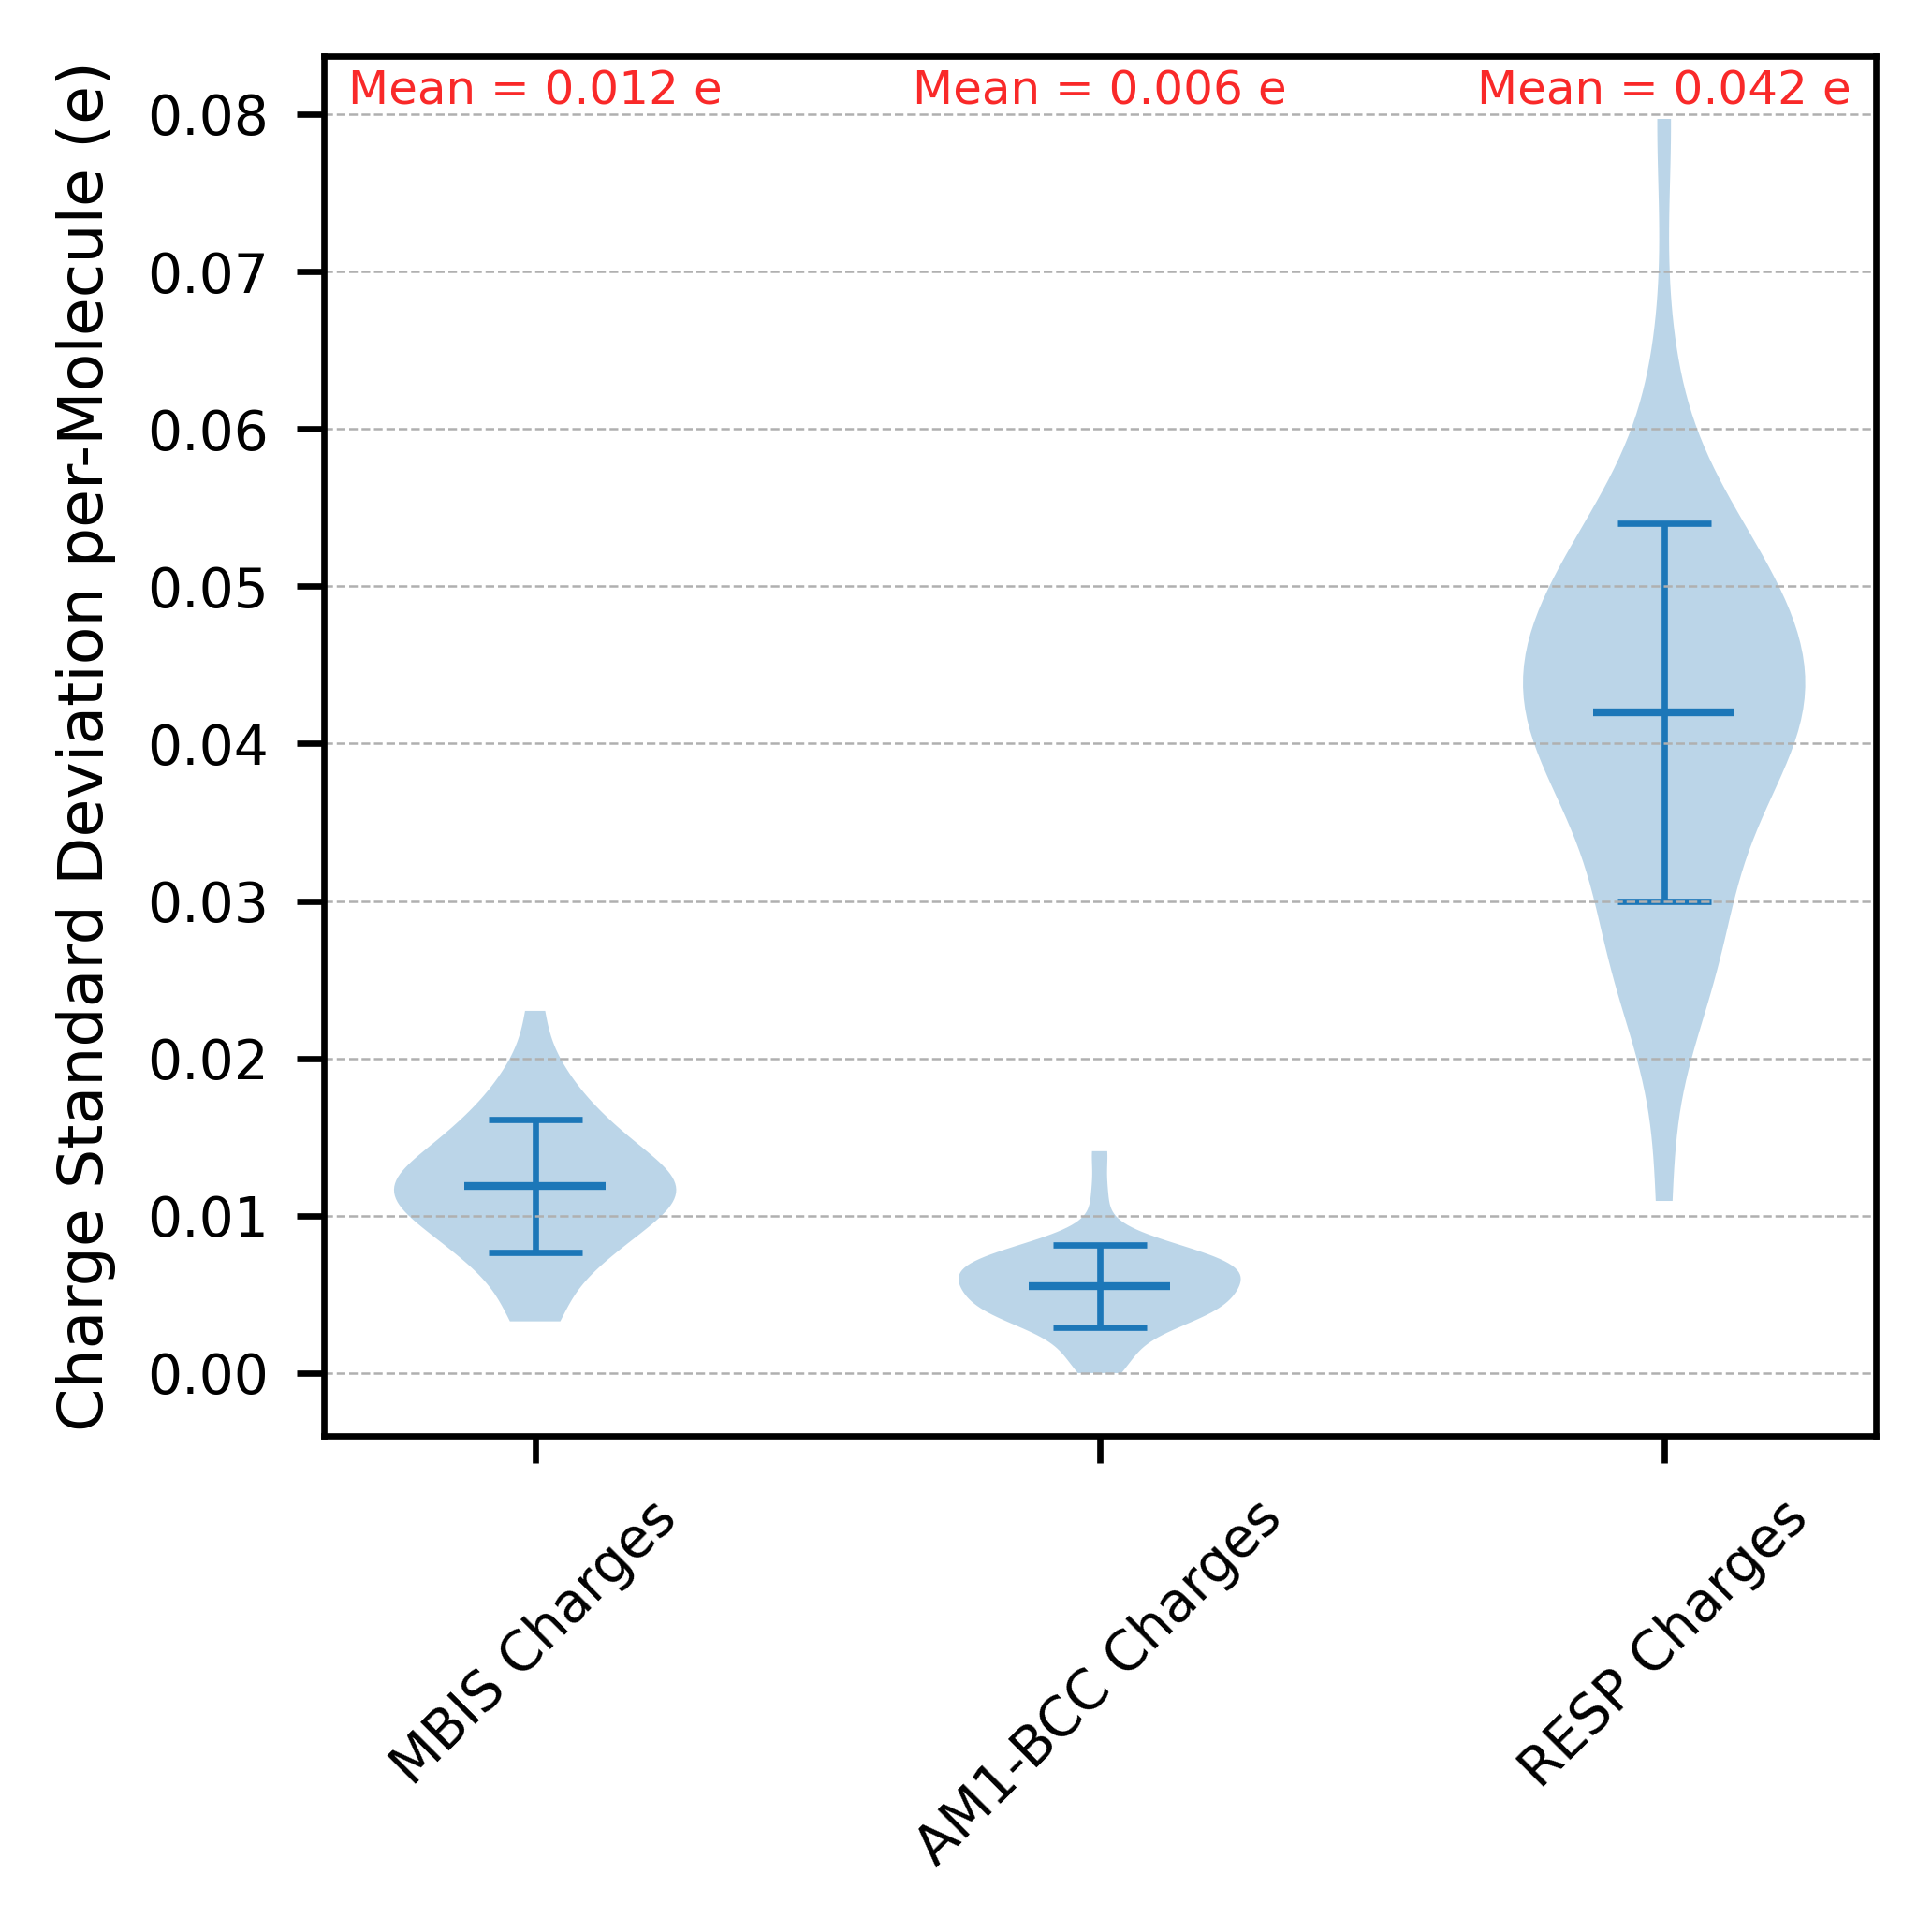

In [10]:
matplotlib.rcParams.update({
    "font.size"       : 10,
    "axes.labelsize"  : 8,
    "axes.titlesize"  : 8,
    "xtick.labelsize" : 7,
    "ytick.labelsize" : 7,
})

charge_models = ["mbis_charges", "am1bcc_charges", "resp_charges"]

# Choose how to summarise the per-atom SDs inside a molecule
def summarise_per_atom_sds(per_atom_sd, mode="mean"):
    if mode == "mean":               # average absolute wiggle per atom
        return per_atom_sd.mean()
    elif mode == "rms":              # root-mean-square wiggle
        return np.sqrt((per_atom_sd**2).mean())
    elif mode == "max":              # worst-case (largest) wiggle
        return per_atom_sd.max()
    else:
        raise ValueError("mode must be 'mean', 'rms', or 'max'")

summary_mode = "mean"          # change to "rms" or "max" if you prefer

grouped = df.groupby("smiles", sort=False)   # keep original order if you like
std_deviation_data = {m: [] for m in charge_models}

for smiles, group in grouped:
    n_conf = len(group)
    if n_conf < 2:          # cannot compute SD with one conformer
        continue

    for model in charge_models:
        # charges: (n_conf, n_atoms) array
        charges = np.stack(group[model].to_numpy())
        per_atom_sd = np.std(charges, axis=0, ddof=1)      # within-molecule SD
        mol_sd = summarise_per_atom_sds(per_atom_sd, summary_mode)
        std_deviation_data[model].append(mol_sd)


violin_data = [std_deviation_data[m] for m in charge_models]
mean_sd = {m: np.mean(vals) for m, vals in std_deviation_data.items()}
std_of_sds = {m: np.std(vals, ddof=1) for m, vals in std_deviation_data.items()}  


fig, ax = plt.subplots(figsize=(3.54, 3.54), dpi=600)
parts = ax.violinplot(
    violin_data,
    showmeans=True,             # mean is plotted as a thick bar
    showextrema=False,
    showmedians=False
)
mean_bar_color = "#1c77b8"  # color for the mean bar

x = np.arange(1, len(charge_models) + 1)
ax.errorbar(
    x,
    [mean_sd[m] for m in charge_models],
    yerr=[std_of_sds[m] for m in charge_models],
    fmt="none",
    color="#1c77b8",    # color for the marker
    ecolor="#1c77b8",
    elinewidth=0.8,
    capsize=6,
    capthick=0.8,
    zorder=1          # make sure they sit on top of the violins
)

parts['cmeans'].set_edgecolor(mean_bar_color)  
parts['cmeans'].set_linewidth(1)


#Set font size here
font_size = 10
# Mean annotations just above each violin
for i, model in enumerate(charge_models, start=1):
    ax.text(i, 0.08,
            f"Mean = {mean_sd[model]:.3f} e",
            ha="center", va="bottom", color="#f92929", fontsize=matplotlib.rcParams['font.size'] * 0.6)

ax.set_xticks(range(1, len(charge_models) + 1),labels=['MBIS Charges','AM1-BCC Charges','RESP Charges'], rotation=45)#, fontsize=font_size)
# ax.set_xticklabels(charge_models, rotation=30, ha="right")
ax.set_ylabel(f"Charge Standard Deviation per-Molecule (e)")#, fontsize=font_size)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
fig.tight_layout()
plt.savefig("charge_sd.png", dpi=300, bbox_inches='tight')
plt.show()


In [11]:
charge_models = ["am1bcc_esp", "resp_esp", "mbis_esp"]

compare_with = "qm_esp"

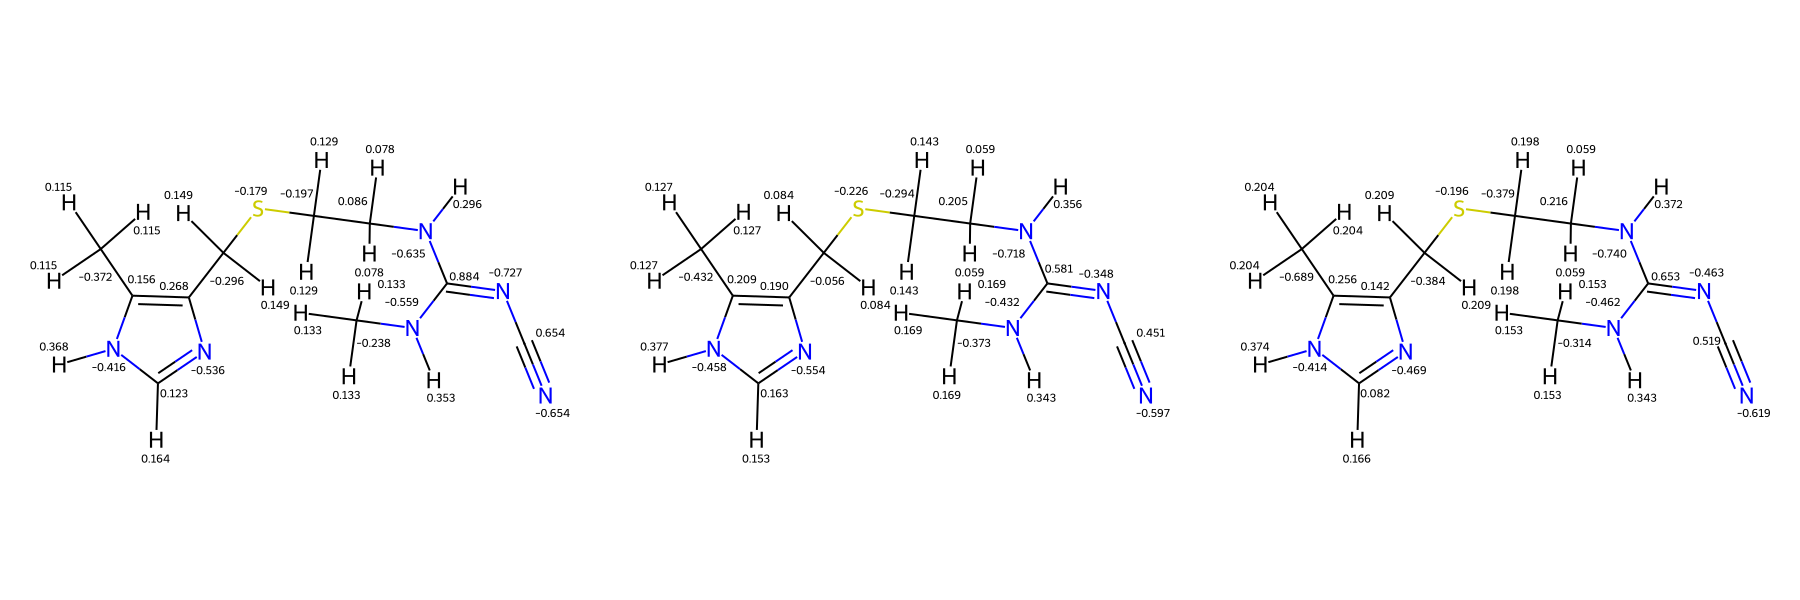

In [12]:
draw_mols  = list(range(1,4))
images = []
for mol in draw_mols:
    openff_molecule = Molecule.from_mapped_smiles(df.iloc[mol]['molecule'], allow_undefined_stereo=True)
    rdkit_mol = openff_molecule.to_rdkit()
    resp_charges =  df.iloc[mol]['resp_charges']
    for i, atom in enumerate(rdkit_mol.GetAtoms()):
        lbl = '%.3f' % (resp_charges[i])
        atom.SetProp('atomNote', lbl)
    images.append(rdkit_mol)

img = Draw.MolsToGridImage(images, molsPerRow=3, subImgSize=(600, 600))
img

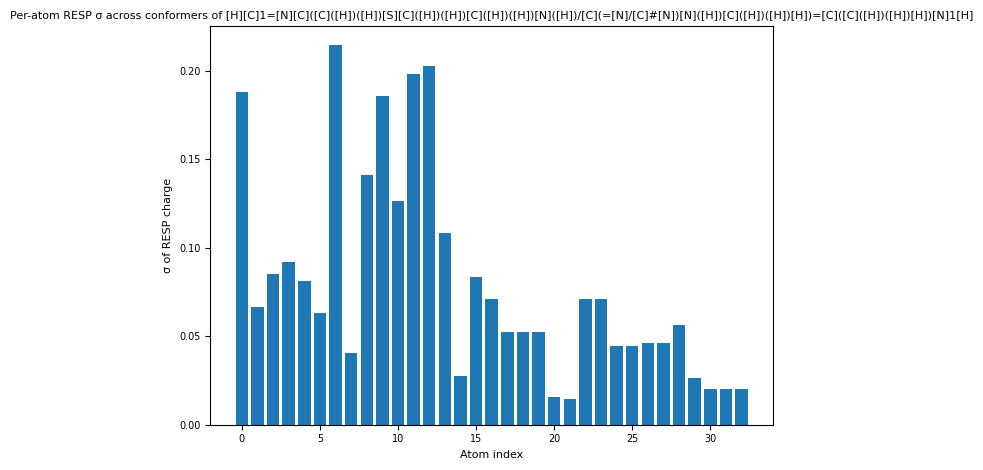

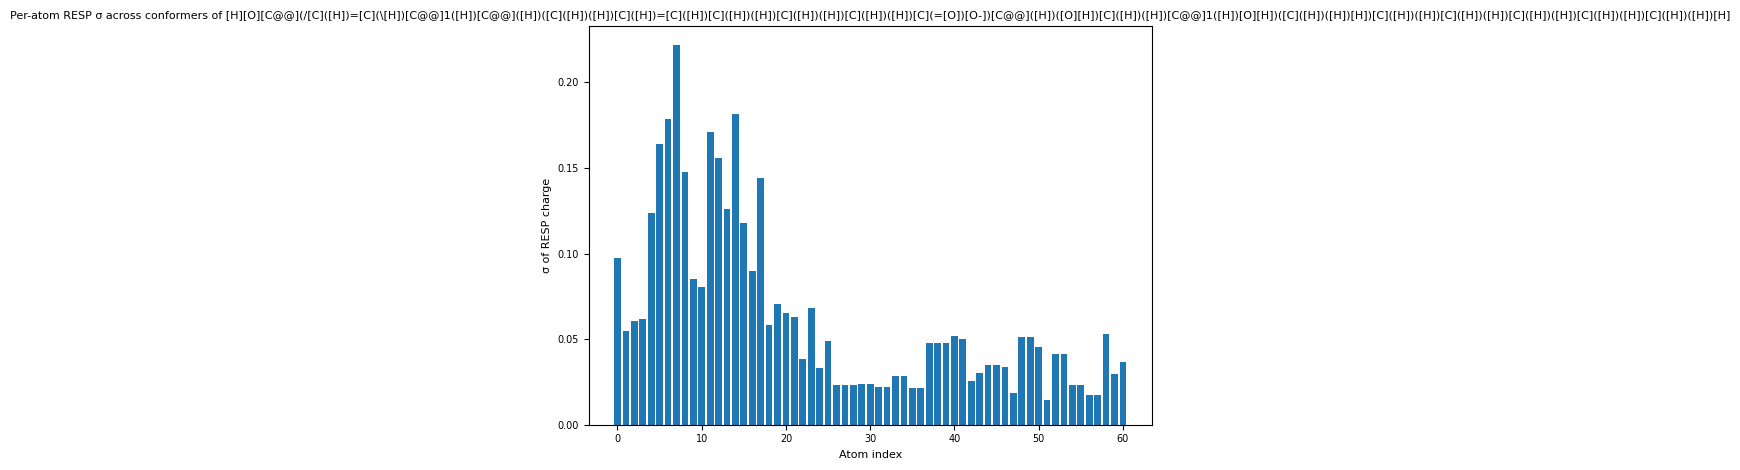

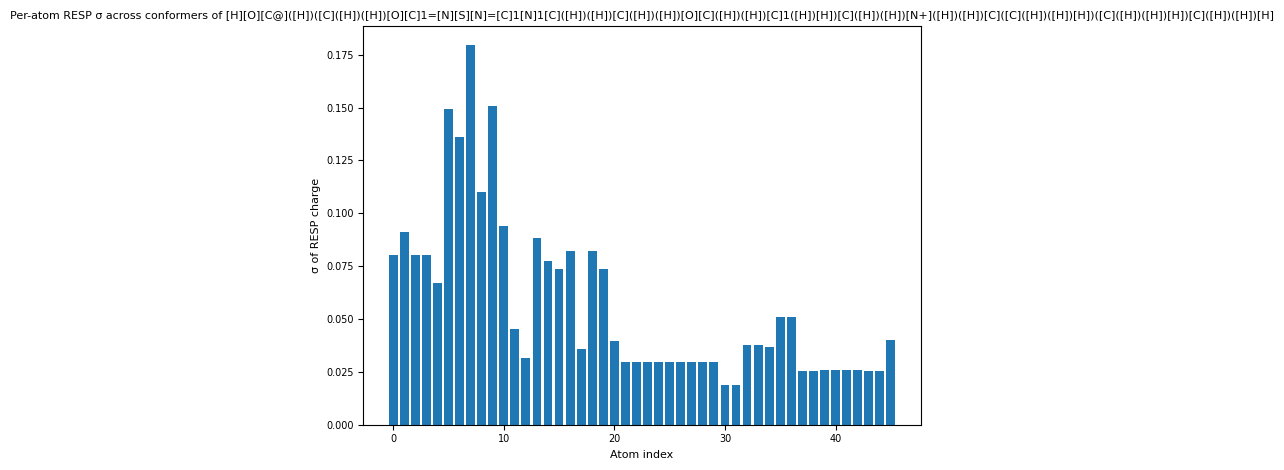

In [13]:

def mean_per_atom_std(charge_lists):
    """
    charge_lists: an iterable of equal-length lists/arrays of atomic charges
    returns: mean of the per-atom stddev across conformers
    """
    mat = np.vstack(charge_lists)         # shape: (n_conformers, n_atoms)
    atom_std = mat.std(axis=0, ddof=1)    # per-atom σ
    return atom_std.mean()                # or atom_std.max() if you prefer

variation = (
    df.groupby('smiles')['resp_charges']
      .agg(lambda lists: mean_per_atom_std(lists))
      .reset_index(name='mean_atom_std')
)

# pick top 3 by that metric
top3 = variation.nlargest(3, 'mean_atom_std')
top3_smiles = top3['smiles'].tolist()


top3_df = df[df['smiles'].isin(top3_smiles)].copy()


for smi in top3_smiles:
    lists = top3_df[top3_df['smiles']==smi]['resp_charges'].tolist()
    mat   = np.vstack(lists)           # (n_conf, n_atoms)
    atom_std = mat.std(axis=0, ddof=1) # per-atom σ
    plt.figure()
    plt.bar(range(len(atom_std)), atom_std)
    plt.title(f'Per-atom RESP σ across conformers of {smi}')
    plt.xlabel('Atom index')
    plt.ylabel('σ of RESP charge')
    plt.tight_layout()
    plt.show()



In [14]:

separate_sdf = False    

def mean_atom_std(lists_of_charges):
    mat = np.vstack(lists_of_charges)
    return mat.std(axis=0, ddof=1).mean()

variation = (
    df.groupby('smiles')['resp_charges']
      .agg(lambda L: mean_atom_std(L))
      .reset_index(name='mean_atom_std')
)
top_smiles = variation.nlargest(50, 'mean_atom_std')['smiles'].iloc[0]

# subdf = (
#     df[df['smiles'] == top_smiles]
#     .sort_values('conformer_no')
#     .reset_index(drop=True)
# )
subdf = (
    df
    .sort_values(['smiles','conformer_no'])
    .reset_index(drop=True)
)
n_confs = subdf.shape[0]

params = Chem.SmilesParserParams()
params.removeHs = False

if not separate_sdf:
    combined_writer = rdmolfiles.SDWriter("combined.sdf")

mols_for_drawing = []
df_excel = []
for row in subdf.itertuples(index=False):
    row_write = {}
    print(row.molecule, row.conformer_no)
    row_write['conformer_no'] = row.conformer_no    
    row_write['smiles'] = row.smiles
    mol = Chem.MolFromSmiles(row.molecule, params)
    mol.RemoveAllConformers()
    flat = np.array(row.geometry, dtype=float)
    coords = flat.reshape(-1, 3)
    conf = Chem.Conformer(mol.GetNumAtoms())
    for atom in mol.GetAtoms():
        m = atom.GetAtomMapNum()
        if not (1 <= m <= coords.shape[0]):
            raise ValueError(f"AtomMapNum {m} out of range (n_atoms={coords.shape[0]})")
        x, y, z = coords[m-1]
        conf.SetAtomPosition(atom.GetIdx(), Point3D(x, y, z))
    mol.AddConformer(conf, assignId=True)

    for atom in mol.GetAtoms():
        m = atom.GetAtomMapNum()
        atom.SetAtomMapNum(0)  # clear map so it won’t render
        if 1 <= m <= len(row.resp_charges):
            chg = row.resp_charges[m-1]
            atom.SetProp("RESP_CHG", f"{chg:.6f}")
            atom.SetProp("atomNote", f"{chg:.2f}")
        else:
            atom.SetProp("atomNote", "")

    if separate_sdf:
        fname = f"{top_smiles}_conf{row.conformer_no}.sdf"
        w = rdmolfiles.SDWriter(fname)
        w.write(mol)
        w.close()
        print(f"Wrote {fname}")
    else:
        combined_writer.write(mol)

    mol2d = Chem.Mol(mol)               # deep copy, keeps atomNote props
    AllChem.Compute2DCoords(mol2d)
    mols_for_drawing.append(mol2d)

    df_excel.append(row_write)

df_excel = pd.DataFrame(df_excel)
df_excel.to_excel("sorted_combined.xlsx", index=False) 
if not separate_sdf:
    combined_writer.close()
    print("Wrote combined.sdf")


[C:1]([C:2]([O:3][C:4](=[O:5])/[C:6](=[C:7]([C:8]([H:33])([H:34])[H:35])/[C:9](=[C:10]([C:11](=[C:12]([C:13]([H:39])([H:40])[H:41])/[C:14](=[C:15](/[c:16]1[c:17]([C:26]([H:54])([H:55])[H:56])[c:18]([H:44])[c:19]([O:24][C:25]([H:51])([H:52])[H:53])[c:20]([C:23]([H:48])([H:49])[H:50])[c:21]1[C:22]([H:45])([H:46])[H:47])[H:43])[H:42])/[H:38])\[H:37])[H:36])[H:32])([H:30])[H:31])([H:27])([H:28])[H:29] 0
[C:1]([C:2]([O:3][C:4](=[O:5])/[C:6](=[C:7]([C:8]([H:33])([H:34])[H:35])/[C:9](=[C:10]([C:11](=[C:12]([C:13]([H:39])([H:40])[H:41])/[C:14](=[C:15](/[c:16]1[c:17]([C:26]([H:54])([H:55])[H:56])[c:18]([H:44])[c:19]([O:24][C:25]([H:51])([H:52])[H:53])[c:20]([C:23]([H:48])([H:49])[H:50])[c:21]1[C:22]([H:45])([H:46])[H:47])[H:43])[H:42])/[H:38])\[H:37])[H:36])[H:32])([H:30])[H:31])([H:27])([H:28])[H:29] 1
[C:1]([C:2]([O:3][C:4](=[O:5])/[C:6](=[C:7]([C:8]([H:33])([H:34])[H:35])/[C:9](=[C:10]([C:11](=[C:12]([C:13]([H:39])([H:40])[H:41])/[C:14](=[C:15](/[c:16]1[c:17]([C:26]([H:54])([H:55])[H:56])[c:

[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C]([H])([H])[N]([H])/[C](=[N]/[C]#[N])[N]([H])[C]([H])([H])[H])=[C]([C]([H])([H])[H])[N]1[H]


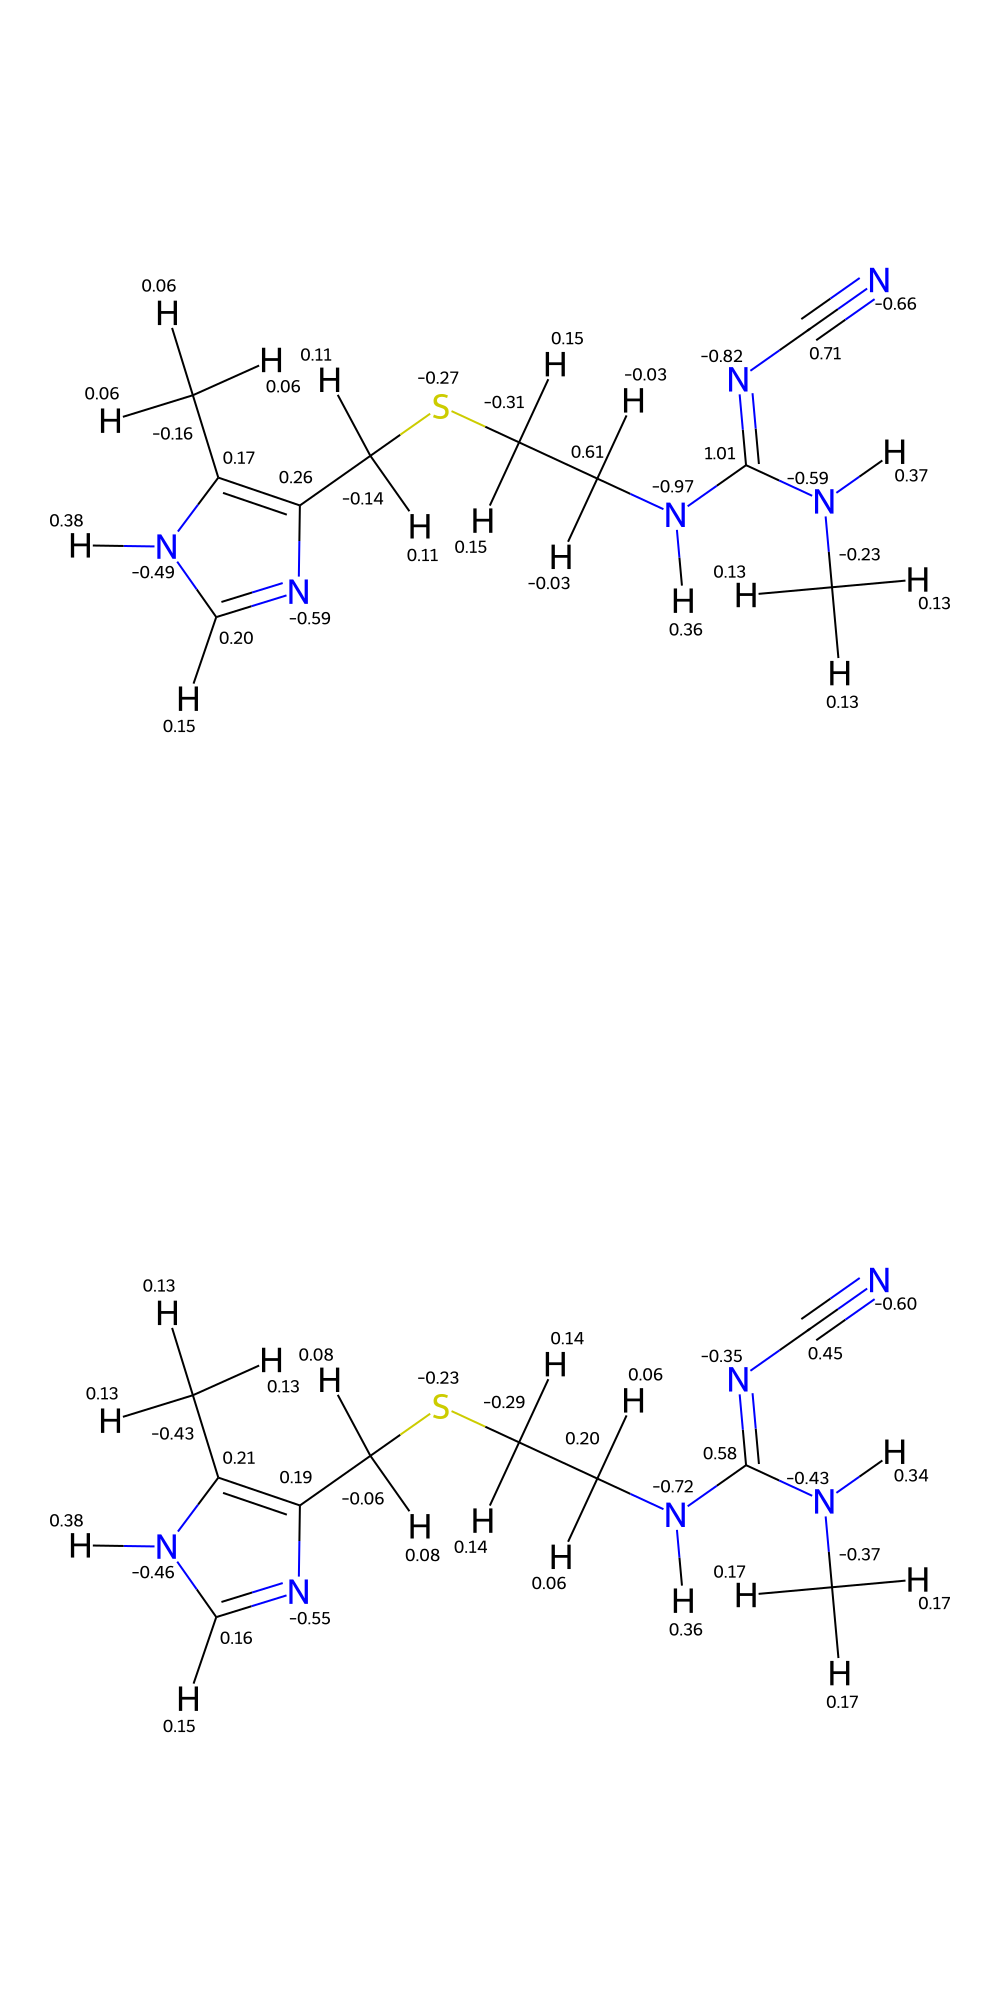

In [19]:
from rdkit.Chem.Draw import rdMolDraw2D, rdDepictor

variation = (
    df.groupby('smiles')['resp_charges']
      .agg(lambda L: mean_atom_std(L))
      .reset_index(name='mean_atom_std')
)
top_smiles = variation.nlargest(50, 'mean_atom_std')['smiles'].iloc[0]
print(top_smiles)

subdf = (
    df[df['smiles'] == top_smiles]
    .sort_values('conformer_no')
    .reset_index(drop=True)
)

mols_for_drawing = []

for row in subdf.iterrows():
    row = row[1]
    mol = Chem.MolFromSmiles(row.molecule, params)
    mol2d = Chem.Mol(mol)               # deep copy, keeps atomNote props
    AllChem.Compute2DCoords(mol2d)
    for atom in mol2d.GetAtoms():
        m = atom.GetAtomMapNum()
        atom.SetAtomMapNum(0)  # clear map so it won’t render
        if 1 <= m <= len(row.resp_charges):
            chg = row.resp_charges[m-1]
            atom.SetProp("RESP_CHG", f"{chg:.6f}")
            atom.SetProp("atomNote", f"{chg:.2f}")
        else:
            atom.SetProp("atomNote", "")

    mols_for_drawing.append(mol2d)

# d = rdMolDraw2D.MolDraw2DSVG(-1, -1)
# d.drawOptions().padding = 0.0
# d.drawOptions().scalingFactor = 30


Img = Draw.MolsToGridImage(
    mols_for_drawing[:2],
    molsPerRow=min(n_confs, 1),
    subImgSize=(1000,1000),
    useSVG=False,
    returnPNG=False,
    # legends=[f"{i+1}" for i,_ in enumerate(mols_for_drawing)]
)
Img

In [20]:
Img.save("mols_resp.png")